In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [49]:
from subprocess import check_output


In [50]:
data = pd.read_csv(r"C:\Users\v-smsing\Desktop\Deep Learning Project\sandp500\all_stocks_5yr.csv")
cl = data[data['Name']=='MMM'].close

In [52]:
type(cl)

pandas.core.series.Series

In [53]:

scl = MinMaxScaler()
#Scale the data
cl = cl.values.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.00580061],
       [0.00554564],
       [0.01090005],
       ...,
       [0.82668281],
       [0.84064253],
       [0.83783784]])

In [54]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


Train on 1000 samples, validate on 251 samples
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - acc: 1.0000e-03 - val_loss: 0.0269 - val_acc: 0.0040
Epoch 2/10
1000/1000 [==============================] - 1s 616us/step - loss: 0.0068 - acc: 1.0000e-03 - val_loss: 0.0015 - val_acc: 0.0040
Epoch 3/10
1000/1000 [==============================] - 1s 634us/step - loss: 0.0037 - acc: 1.0000e-03 - val_loss: 9.5177e-04 - val_acc: 0.0040
Epoch 4/10
1000/1000 [==============================] - 1s 678us/step - loss: 3.8704e-04 - acc: 1.0000e-03 - val_loss: 0.0014 - val_acc: 0.0040
Epoch 5/10
1000/1000 [==============================] - 1s 624us/step - loss: 3.9897e-04 - acc: 1.0000e-03 - val_loss: 0.0010 - val_acc: 0.0040
Epoch 6/10
1000/1000 [==============================] - 1s 627us/step - loss: 6.5901e-04 - acc: 1.0000e-03 - val_loss: 5.6671e-04 - val_acc: 0.0040
Epoch 7/10
1000/1000 [==============================] - 1s 622us/step - loss: 3.7695e-04 - acc:

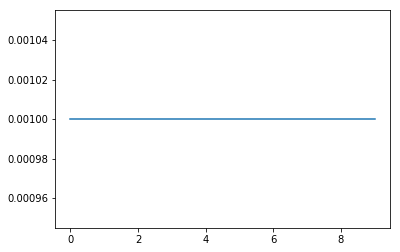

In [82]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add( Dense(1))
model.compile(optimizer='adam',loss='mse', metrics=['acc'])
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit( X_train,y_train,epochs=10,validation_data=(X_test,y_test),shuffle=False)

# plot metrics
pyplot.plot(history.history['acc'])
pyplot.show()

In [72]:
from matplotlib import pyplot

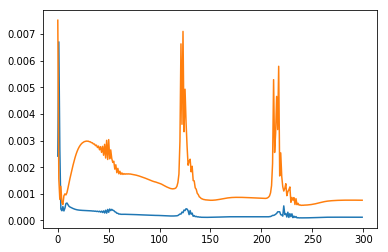

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

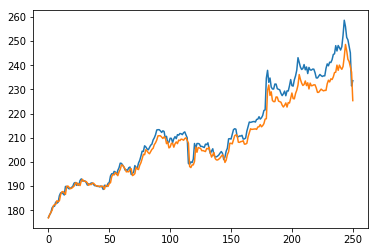

In [57]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [58]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[237.17886]], actual:[[231.44]]


In [59]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

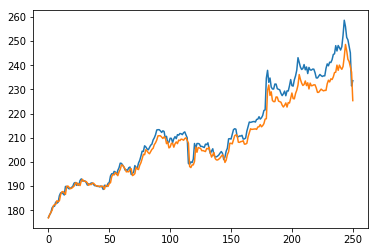

In [60]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))